# Lab13: Stock price prediction
### Réalisé par: Your Name  email@
### EMSI 2024/2025


# T.A.F
1. Démarrer 
2. Analyser
3. Améliorer

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

# Step 1: Dataset
 url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

In [5]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values
print(dataset_train)
# Data transformation
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

            Date    Open    High     Low    Last   Close  \
0     2018-09-28  234.05  235.95  230.20  233.50  233.75   
1     2018-09-27  234.55  236.80  231.10  233.80  233.25   
2     2018-09-26  240.00  240.00  232.50  235.00  234.25   
3     2018-09-25  233.30  236.75  232.00  236.25  236.10   
4     2018-09-24  233.55  239.20  230.75  234.00  233.30   
...          ...     ...     ...     ...     ...     ...   
2030  2010-07-27  117.60  119.50  112.00  118.80  118.65   
2031  2010-07-26  120.10  121.00  117.10  117.10  117.60   
2032  2010-07-23  121.80  121.95  120.25  120.35  120.65   
2033  2010-07-22  120.30  122.00  120.25  120.75  120.90   
2034  2010-07-21  122.10  123.00  121.05  121.10  121.55   

      Total Trade Quantity  Turnover (Lacs)  
0                  3069914          7162.35  
1                  5082859         11859.95  
2                  2240909          5248.60  
3                  2349368          5503.90  
4                  3423509          7999.55  
...

# Step 2: Model

In [7]:
# Initialize the LSTM model
model = Sequential()

# Add the first LSTM layer with return_sequences=True
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Add the second LSTM layer with return_sequences=True
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the third LSTM layer with return_sequences=True
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Add the fourth LSTM layer without return_sequences
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Add the Dense output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

D:\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Step 3: train

In [15]:
model.fit(X_train,y_train,epochs=55,batch_size=32)

Epoch 1/55
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 7.4320e-04
Epoch 2/55
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 9.6679e-04
Epoch 3/55
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 9.0500e-04
Epoch 4/55
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0010
Epoch 5/55
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 9.5922e-04
Epoch 6/55
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 7.5056e-04
Epoch 7/55
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 8.1663e-04
Epoch 8/55
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 8.5832e-04
Epoch 9/55
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 7.4295e-04
Epoch 10/55
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 7.4773e-04
Epoch 11/55
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 8.1491e-04
Epoch 12/55
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 8.0816e-04
Epoch 13/55
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0010
Epoch 14/55
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 7.8421e-04
Epoch 15/55
62/62 ━━━━━

# Step 4: test
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'

In [17]:
print(len(dataset_test)) 

16


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


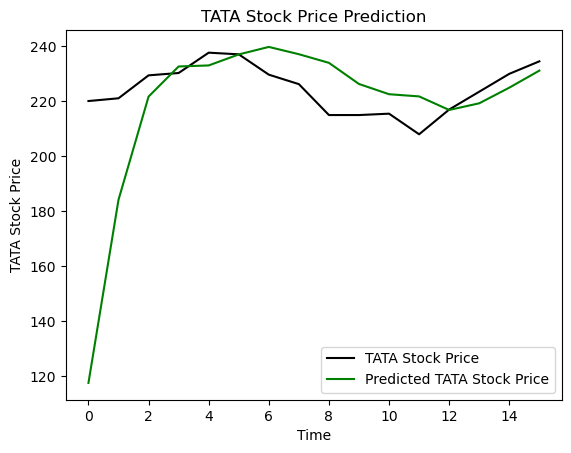

In [19]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Prediction
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()
print()

#  save the model

In [21]:
model.save('tata_model.h5')